# Boston Crime Data Analysis

## Introduction

 - This project contains 9 datasets of the Boston Police Department

Objective:
- Analyse crime in different areas in Boston over time 
- Identify seasonality trends
- Determine the safest neighborhoods in the locality 

Process:
- Data Loading and preprocessing
- Data Analysis to support real world problems

In [3]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from colour import Color
from sklearn.preprocessing import LabelEncoder
import seaborn as sn

In [4]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

def insert_data(file,create_statement,insert_statement,val):
    dr ={}
    conn = create_connection('Boston_crime.db', True)
    cur = conn.cursor()
    with conn:
        create_table(conn,create_statement)
    with open(file,'r') as file:
        shootings_dict = csv.DictReader(file)
    cur.executemany(insert_statement,val)
    conn.commit()
    conn.close()

def Crime_Inc_Rep(file):
    conn = create_connection('Boston_crime.db', True)
    cur = conn.cursor()
    with open(file,'r') as file:
        my_dict = csv.DictReader(file)
        val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
            ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
            ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
            ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
            ,i['Location']) for i in my_dict]

    cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)
    conn.commit()
    conn.close()

conn = create_connection('Boston_crime.db', True)
cur = conn.cursor()

In [5]:
#Shootings Table Data
dr ={}

sql_statement = '''CREATE table Shootings (Incident_Num TEXT, Shooting_Date TEXT, 
                  District TEXT, Shooting_Type_V2 TEXT, Victim_Gender TEXT, 
                  Victim_Race TEXT,Victim_Ethnicity_NIBRS TEXT,Multi_Victim TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('Shootings.csv','r') as file:
    shootings_dict = csv.DictReader(file)
    val = [(i['Incident_Num'],i['Shooting_Date'],i['District'],i['Shooting_Type_V2'],i['Victim_Gender'],i['Victim_Race'],i['Victim_Ethnicity_NIBRS'],i['Multi_Victim']) for i in shootings_dict]

cur.executemany("INSERT INTO SHOOTINGS VALUES (?,?,?,?,?,?,?,?)",val)
conn.commit()
    

In [6]:
#Shots Fired Table Data
dr ={}
sql_statement = '''CREATE table Shots_Fired(Incident_Num TEXT, Incident_Date TEXT, 
                  District TEXT, Ballistics_Evidence TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('Shots_Fired.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['Incident_Num'],i['Incident_Date'],i['District'],i['Ballistics_Evidence']) for i in my_dict]

cur.executemany("INSERT INTO Shots_Fired VALUES (?,?,?,?)",val)
conn.commit()


In [7]:
#Crime Incident Report Table Data
dr ={}

sql_statement = '''CREATE table Crime_Incident_Reports(Incident_Num TEXT, Offense_Code TEXT, 
       Offense_Code_Group TEXT, Offense_Description TEXT, District TEXT,
       Reporting_Area TEXT, Shooting TEXT, Occurred_On_Date TEXT, 
       Year TEXT, Month TEXT,Day_Of_Week TEXT, Hour TEXT, UCR_Part,
       Street TEXT, Lat TEXT,Long TEXT, Location TEXT);'''
with conn:
    create_table(conn,sql_statement)

# Crime_Inc_Rep('crime-incident-reports-2015.csv')
# Crime_Inc_Rep('crime-incident-reports-2016.csv')
  
with open('crime-incident-reports-2015.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('crime-incident-reports-2016.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('crime-incident-reports-2017.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('crime-incident-reports-2018.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)

with open('Crime_Incident_Reports_2019.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)


with open('Crime_Incident_Reports_2020.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)


with open('Crime_Incident_Reports_2021.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['INCIDENT_NUMBER'],i['OFFENSE_CODE'],i['OFFENSE_CODE_GROUP'],i['OFFENSE_DESCRIPTION']
          ,i['DISTRICT'],i['REPORTING_AREA'],i['SHOOTING'],i['OCCURRED_ON_DATE']
          ,i['YEAR'],i['MONTH'],i['DAY_OF_WEEK'],i['HOUR']
          ,i['UCR_PART'],i['STREET'],i['Lat'],i['Long']
          ,i['Location']) for i in my_dict]
cur.executemany("INSERT INTO Crime_Incident_Reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)


conn.commit()



In [8]:
#BEST Table data

dr ={}
sql_statement = '''CREATE table Best(Month TEXT, Incidents TEXT, 
                  Proactive_Engagements TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('Boston Emergency Services Team Best.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['Month'],i['incidents'],i['proactive_engagements']) for i in my_dict]

cur.executemany("INSERT INTO Best VALUES (?,?,?)",val)
conn.commit()


In [9]:
# in_custody_death Table data
dr ={}
sql_statement = '''CREATE table in_custody_deaths(incident_number TEXT, incident_date TEXT, 
                  incident_location TEXT, incident_district TEXT,during_arrest TEXT, during_transport TEXT,
                  while_in_holding_cell TEXT, other TEXT,
                  prisoner_age TEXT, prisoner_race TEXT,
                  prisoner_sex_mf TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('in-custody-deaths.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['incident_number'],i['incident_date'],i['incident_location']
          ,i['incident_district'],i['during_arrest'],i['during_transport'],i['while_in_holding_cell']
          ,i['other'],i['prisoner_age'],i['prisoner_race'],i['prisoner_sex_mf']) for i in my_dict]

cur.executemany("INSERT INTO in_custody_deaths VALUES (?,?,?,?,?,?,?,?,?,?,?)",val)
conn.commit()



In [10]:
# bpd_firearm_recovery_counts table data
dr ={}
sql_statement = '''CREATE table bpd_firearm_recovery_counts(collection_date TEXT, crime_guns_recovered TEXT, 
                  guns_recovered_safeguard TEXT, buyback_gunsrecovered);'''
with conn:
    create_table(conn,sql_statement)
with open('BPD Firearm Recovery Counts.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['CollectionDate'],i['CrimeGunsRecovered'],i['GunsRecoveredSafeguard']
          ,i['BuybackGunsRecovered']) for i in my_dict]

cur.executemany("INSERT INTO bpd_firearm_recovery_counts VALUES (?,?,?,?)",val)
conn.commit()


In [11]:
# homicide_clearance_rate table data
dr ={}
sql_statement = '''CREATE table homicide_clearance_rate(year TEXT, homicides TEXT, 
                  same_year_clear TEXT, previous_year_clear TEXT, 
                  same_year_not_cleared TEXT, total_clear TEXT,
                  percent_cleared_same_year TEXT, percent_cleared_previous_year TEXT,
                  percent_not_cleared_same_year TEXT, clearance_rate TEXT,
                  percent_of_cleared_same_year TEXT, percent_of_cleared_previous_year TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('homicide-clearance-rate.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['Year'],i['Homicides'],i['Same Year Clear']
          ,i['Previous Year Clear'],i['Same Year Not Cleared'],i['Total Clear']
          ,i['Percent Cleared Same Year'],i['Percent Cleared Previous Year']
          ,i['Percent Not Cleared Same Year'],i['Clearance Rate'],i['Percent of Cleared Same Year']
          ,i['Percent of Cleared Previous Year']) for i in my_dict]

cur.executemany("INSERT INTO homicide_clearance_rate VALUES (?,?,?,?,?,?,?,?,?,?,?,?)",val)
conn.commit()


In [12]:
#historical_data_crime_incident_reports table data
dr ={}
sql_statement = '''CREATE table historical_data_crime_incident_reports(compnos TEXT, nature_code TEXT, 
                  incident_type_desc TEXT, main_crime_code TEXT, 
                  rept_district TEXT, reporting_area TEXT,
                  from_date TEXT, weapon_type TEXT,
                  shooting TEXT, domestic TEXT,
                  shift TEXT, year TEXT,month TEXT, day_week TEXT,
                  ucr_part TEXT, x TEXT, y TEXT,
                  street_name TEXT, xstreet_name TEXT,location TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('crime-incident-reports-july-2012-august-2015-source-legacy-system.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['COMPNOS'],i['NatureCode'],i['INCIDENT_TYPE_DESCRIPTION']
          ,i['MAIN_CRIMECODE'],i['REPTDISTRICT'],i['REPORTINGAREA']
          ,i['FROMDATE'],i['WEAPONTYPE']
          ,i['Shooting'],i['DOMESTIC'],i['SHIFT']
          ,i['Year'],i['Month'],i['DAY_WEEK'],i['UCRPART']
          ,i['X'],i['Y'],i['STREETNAME']
          ,i['XSTREETNAME'],i['Location']) for i in my_dict]

cur.executemany("INSERT INTO historical_data_crime_incident_reports VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",val)
conn.commit()

In [13]:
#rmsoffensecodes Table data
dr ={}
sql_statement = '''CREATE table rmsoffensecodes(code TEXT, name TEXT);'''
with conn:
    create_table(conn,sql_statement)
with open('rmsoffensecodes.csv','r') as file:
    my_dict = csv.DictReader(file)
    val = [(i['CODE'],i['NAME']) for i in my_dict]

cur.executemany("INSERT INTO rmsoffensecodes VALUES (?,?)",val)
conn.commit()

# Data Pre-Processing

In [14]:
sql_statement = """
    create table dp_crime_table_score_card as 
    
    with distinct_vals as 
    (
    select 
    
        distinct 
        cast(Offense_Code as int) as Offense_Code, 
        case 
            when 
                lower(Offense_Description) like '%kill%' or
                lower(Offense_Description) like '%murder%' or
                lower(Offense_Description) like '%prostitution%' or
                lower(Offense_Description) like '%burglary%' or
                lower(Offense_Description) like '%bomb%' or
                lower(Offense_Description) like '%kidnapping%' or
                lower(Offense_Description) like '%manslaughter%' or
                lower(Offense_Description) like '%homicide%' or
                lower(Offense_Description) like '%robbery%' or
                lower(Offense_Description) like '%weapon%'
            then 1000
            when 
                lower(Offense_Description) like '%stole%' or
                lower(Offense_Description) like '%warrant%' or
                lower(Offense_Description) like '%prisoner%' or
                lower(Offense_Description) like '%assault%' or
                lower(Offense_Description) like '%larceny%' or
                lower(Offense_Description) like '%trafficking%' or
                lower(Offense_Description) like '%firearm%' or
                lower(Offense_Description) like '%drug%' or
                lower(Offense_Description) like '%theft%'
            then 500
            else 100
        end as Crime_Score,
        Offense_Description
    
    from Crime_Incident_Reports 
    )
    select 
        ROW_NUMBER() OVER (ORDER BY Offense_Code) as score_card_id,
        Offense_Code,
        Crime_Score,
        Offense_Description
    from 
        distinct_vals
    ;
    """
conn.execute(sql_statement)
conn.commit()

In [15]:
sql_statement = """
    create table dp_district as 
    with distinct_vals as 
    (
        select distinct district 
        from Crime_Incident_Reports 
        WHERE ltrim(rtrim(district)) <> ''
            and lower(district) <> 'external'
    ) select 
    ROW_NUMBER() OVER (ORDER BY district) as district_id,
        district
    from distinct_vals
    ;
    """
conn.execute(sql_statement)
conn.commit()

In [16]:

sql_statement = """
    create table dp_shooting_fatality as 
    with distinct_vals as 
    (
        select distinct 
            Shooting_Type_V2
    from 
        Shootings
    )
    select 
        ROW_NUMBER() OVER (ORDER BY Shooting_Type_V2) as shooting_type_v2_id,
        Shooting_Type_V2
    from
        distinct_vals
    ;
    """
conn.execute(sql_statement)
conn.commit()

In [17]:

sql_statement = """
    create table dp_ethnicity as 
    with distinct_vals as 
    (select distinct 
        Victim_Ethnicity_NIBRS as Ethnicity
    from Shootings
    WHERE ltrim(rtrim(Victim_Ethnicity_NIBRS)) <> ''
    )
    select ROW_NUMBER() OVER (ORDER BY Ethnicity) as ethnicity_id,
        Ethnicity
    from distinct_vals
    ;
    """
conn.execute(sql_statement)
conn.commit()

In [18]:

sql_statement = """
    create table dp_race as 
    with distinct_vals as 
    (
        select distinct 
            Victim_Race as race  
    from Shootings
    WHERE ltrim(rtrim(Victim_Race)) <> ''
    )
    select ROW_NUMBER() OVER (ORDER BY Race) as race_id,
        Race
    from 
    distinct_vals
    ;
    """
conn.execute(sql_statement)
conn.commit()

In [19]:

sql_statement = """
    create table dp_gender as 
    with distinct_vals as 
    (
        select distinct 
            Victim_Gender as gender
    from Shootings
    WHERE ltrim(rtrim(Victim_Gender)) <> ''
    )
    select 
    ROW_NUMBER() OVER (ORDER BY Gender) as gender_id,
        Gender
     from distinct_vals
    ;
    """
conn.execute(sql_statement)
conn.commit()

# Data Analysis

### Trend analysis: Total incidents in Boston between the year 2015-21

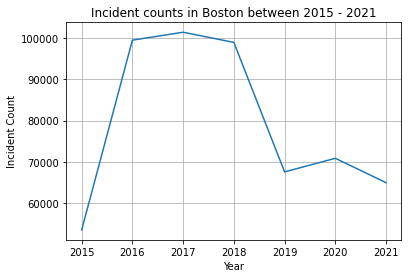

In [20]:
sql1a = """SELECT Year, count(Incident_Num) Incident_Count 
        from Crime_Incident_Reports
    GROUP BY Year"""
df1a = pd.read_sql_query(sql1a, conn)

plt.plot(df1a['Year'], df1a['Incident_Count'])
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Incident counts in Boston between 2015 - 2021')
plt.grid(True)
# conn.execute(sql1a)
# conn.commit()

### Safe and unsafe districts in Boston in the year 2021

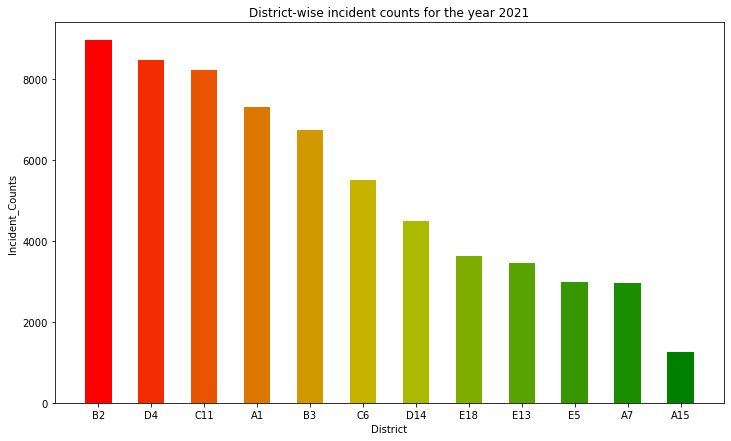

In [21]:
sql1b = """
   SELECT District, count(Incident_Num) Incident_Counts
        from Crime_Incident_Reports
        WHERE District NOT IN ("","External")
        AND Year = 2021
        GROUP BY District
        ORDER BY 2 DESC"""
df1b = pd.read_sql_query(sql1b, conn)
fig = plt.figure(figsize = (12, 7))
 # creating the bar plot
red = Color("red")
colors = list(red.range_to(Color("green"),len(df1b)))
colors = [color.rgb for color in colors]

plt.bar(x = "District", height = "Incident_Counts", data=df1b, color =colors, width = 0.5)
 
plt.title("District-wise incident counts for the year 2021")
plt.xlabel('District')
plt.ylabel('Incident_Counts')
plt.show()

### % Incidents with Shooting

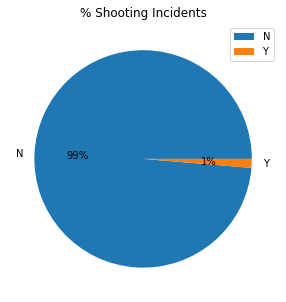

In [22]:
shooting_agg = pd.read_sql_query("""SELECT Shooting, count(Incident_Num) Incident_Count 
                            from Crime_Incident_Reports 
                            WHERE Year = 2021
                            Group by Shooting""", conn)
shooting_agg['Shooting'] = shooting_agg['Shooting'].replace('1','Y')
shooting_agg['Shooting'] = shooting_agg['Shooting'].replace('0','N')
shooting_agg = shooting_agg.groupby('Shooting').sum().reset_index()
shooting_agg['% Shooting Incidents'] = round(shooting_agg['Incident_Count']/(shooting_agg['Incident_Count'].sum()) * 100,2)
# shooting_agg

fig = plt.figure(figsize = (10, 5))
plt.pie(shooting_agg['% Shooting Incidents'], labels = shooting_agg['Shooting'], autopct='%.0f%%')
plt.title('% Shooting Incidents')
plt.legend()
plt.show()

### Hour of the day with maximum and minimum incidents

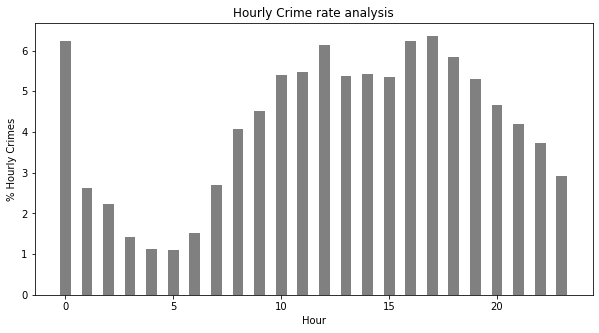

In [23]:
hourly_agg = pd.read_sql_query("""SELECT Hour, count(Incident_Num) Incident_Count 
                            from Crime_Incident_Reports 
                            WHERE Year = 2021
                            Group by Hour
                            ORDER BY Hour""", conn)
# hourly_agg['Hour'] = hourly_agg['Hour'].replace('1','Y')
hourly_agg['% Hourly Crimes'] = round(hourly_agg['Incident_Count']/(hourly_agg['Incident_Count'].sum()) * 100,2)
# shooting_agg
# hourly_agg.sort_values('Hour')
hourly_agg['Hour'] = pd.to_numeric(hourly_agg['Hour'])
hourly_agg = hourly_agg.sort_values('Hour')
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(x = "Hour", height = "% Hourly Crimes", data=hourly_agg, color ='grey',
        width = 0.5,)
 
plt.title("Hourly Crime rate analysis")
plt.xlabel('Hour')
plt.ylabel('% Hourly Crimes')
plt.show()

### Define crime rate as No. of crimes per day in each district

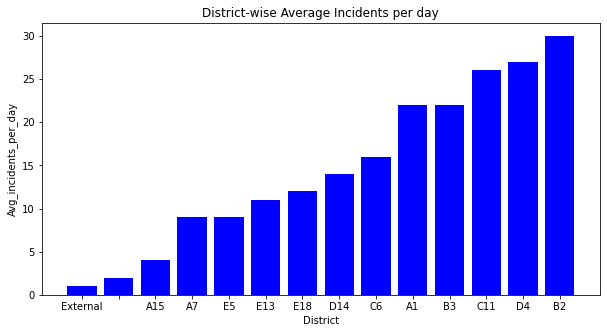

In [24]:
cr_per_day = pd.read_sql_query("""SELECT District, count(Incident_Num)/Count(Distinct Date(Occurred_On_Date)) Avg_incidents_per_day from Crime_Incident_Reports 
                WHERE Year in (2021, 2020, 2019)
                GROUP BY District
                ORDER BY Avg_incidents_per_day
                """, conn)

fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(x = "District", height = "Avg_incidents_per_day", data=cr_per_day, color ='Blue',label='Avg_incidents_per_day')
plt.title("District-wise Average Incidents per day")
plt.xlabel('District')
plt.ylabel('Avg_incidents_per_day')
plt.show()

### Identify the seasonality in crimes from the Crime Incident Reports

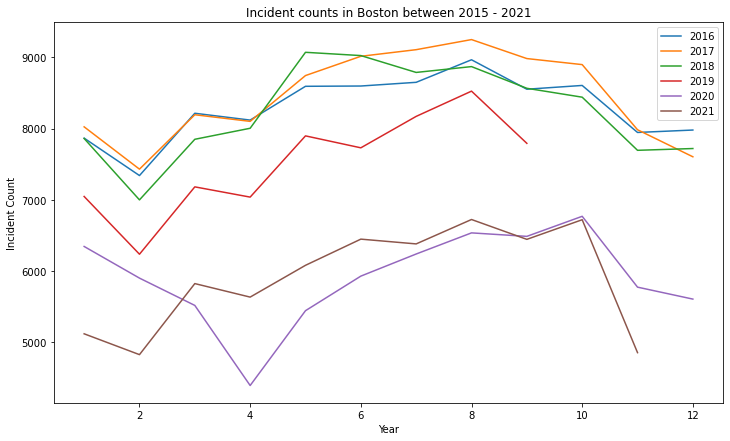

In [25]:
seasonality = pd.read_sql_query("""SELECT Month, Year, Count(Incident_Num) No_of_incidents FROM Crime_Incident_Reports 
                WHERE Year in (2021, 2020, 2019, 2018, 2017, 2016)
                GROUP BY Month, Year
                """, conn)
seasonality['Month'] = pd.to_numeric(seasonality['Month'])
seasonality['Year'] = pd.to_numeric(seasonality['Year'])
seasonality = seasonality.sort_values(['Year','Month'])
seasonality_pvt = seasonality.pivot_table(index = ['Month'],
                    columns='Year', 
                    values='No_of_incidents', 
                    aggfunc='sum').reset_index(drop = False)

fig = plt.figure(figsize = (12, 7))
plt.plot(seasonality_pvt['Month'], seasonality_pvt[2016], label='2016')
plt.plot(seasonality_pvt['Month'], seasonality_pvt[2017], label='2017')
plt.plot(seasonality_pvt['Month'], seasonality_pvt[2018], label='2018')
plt.plot(seasonality_pvt['Month'], seasonality_pvt[2019], label='2019')
plt.plot(seasonality_pvt['Month'], seasonality_pvt[2020], label='2020')
plt.plot(seasonality_pvt['Month'], seasonality_pvt[2021], label='2021')
# plt.plot(df_line1['Year'], df_line1['Rape'], label='Rape')
# plt.plot(df_line1['Year'], df_line1['Robbery'], label='Robbery')
# plt.plot(df_line1['Year'], df_line1['Aggravated_Assault'], label='Aggravated_Assault')

plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Incident counts in Boston between 2015 - 2021')
plt.legend(loc='upper right')

### Identifying the correlation between crime hours and the crime rate

In [26]:
corr_crime = pd.read_sql_query("""select Date(Occurred_On_Date) Occurred_On_Date, Hour, count(Incident_Num) Incidents_per_day_per_hour from Crime_Incident_Reports 
                                WHERE Year in (2021, 2020, 2019, 2018, 2017, 2016)
                                GROUP BY Date(Occurred_On_Date), Hour;""", conn)
corr_crime['Hour'] = corr_crime['Hour'].apply(pd.to_numeric)
corrrel = round(corr_crime['Hour'].corr(corr_crime['Incidents_per_day_per_hour']),2)
print(f"Correlation between Hour of crime and crime rate: {corrrel}")

Correlation between Hour of crime and crime rate: 0.36


In [27]:
### 

In [28]:
corr_df = pd.read_sql_query("""select Offense_Code, District, Year, Month, Day_Of_Week, 
                        Hour, Lat, Long, count(Incident_Num) No_of_Incidents from Crime_Incident_Reports 
                            WHERE Year in (2021, 2020, 2019, 2018, 2017, 2016)
                            GROUP BY Offense_Code, District, Year, Month, Day_Of_Week, Hour, Lat, Long;""", conn)
corr_df[['Year','Month','Hour','Lat','Long']] = corr_df[['Year','Month','Hour','Lat','Long']].apply(pd.to_numeric)
le = LabelEncoder()
corr_df['Offense_Code']= le.fit_transform(corr_df['Offense_Code'])
corr_df['District']= le.fit_transform(corr_df['District'])
corr_df['Day_Of_Week']= le.fit_transform(corr_df['Day_Of_Week'])

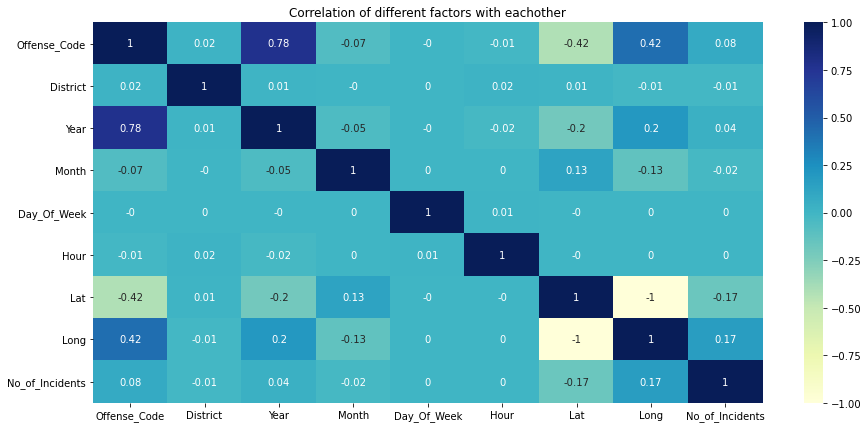

In [29]:
fig = plt.figure(figsize = (15, 7))
corrMatrix = round(corr_df.corr(),2)
sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.title('Correlation of different factors with eachother')
plt.show()

Inference: No strong correlation is observed between the factors and No. of incidents

,district,historical_incidents
0,A1,29653
1,A15,5621
2,A7,12783
3,B2,40640
4,B3,24812
5,C11,34609
6,C6,20767
7,D14,19520
8,D4,37908
9,E13,15167


<AxesSubplot:title={'center':'number of incidents for years 2012 - 2015'}, xlabel='district'>

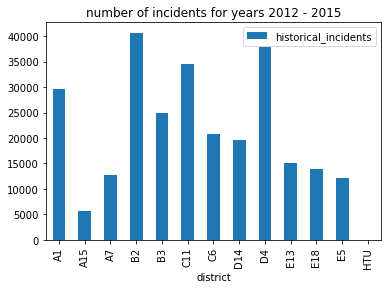

In [30]:

sql_statement = """
    select distinct 
        rept_district as district,
        count(*) as historical_incidents
    from 
     historical_data_crime_incident_reports      
    group by  1       
    having ltrim(rtrim(rept_district)) <> ''
        and rept_district <> 'NULL'  
    ;"""
df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot(x = 'district', y = 'historical_incidents', kind = 'bar', title = 'number of incidents for years 2012 - 2015')

,weapon,count_of_weapons
0,Blunt Object,78
1,Firearm,5299
2,Knife,3867
3,Knife/Cutting Instrument,177
4,None,11319
5,Other,52102
6,Personal Weapon (hand foot etc.),282
7,Unarmed,194932


<AxesSubplot:title={'center':'number of incidents for years 2012 - 2015'}, xlabel='weapon'>

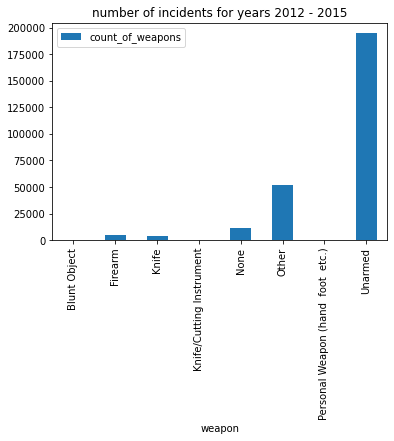

In [31]:

sql_statement = """

    select distinct weapon_type as weapon,
        count(*) as count_of_weapons
    from historical_data_crime_incident_reports
    group by 1
    having ltrim(rtrim(weapon_type)) <> ''   
    ;"""
df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot(x = 'weapon', y = 'count_of_weapons', kind = 'bar', title = 'number of incidents for years 2012 - 2015')

,shooting_ind,domestic_ind,day_week
0,0,0,7
1,1,0,7
2,0,0,7
3,0,0,7
4,0,0,7
...,...,...,...
268051,0,0,1
268052,0,0,1
268053,0,0,1
268054,0,0,1


array([[<AxesSubplot:title={'center':'shooting_ind'}>,
        <AxesSubplot:title={'center':'domestic_ind'}>],
       [<AxesSubplot:title={'center':'day_week'}>, <AxesSubplot:>]],
      dtype=object)

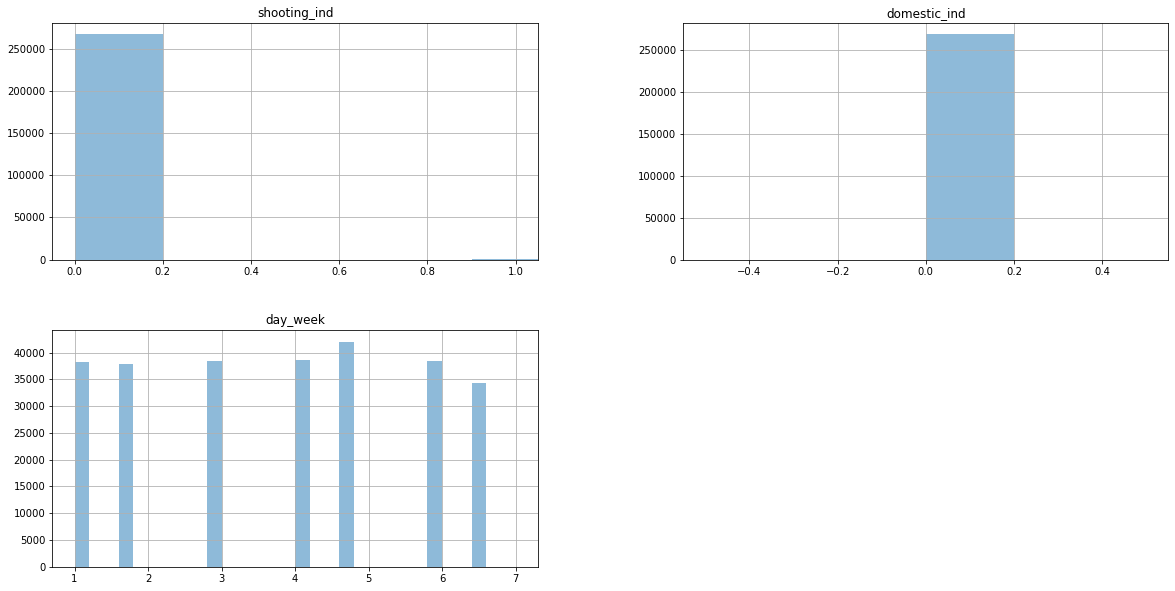

In [32]:

sql_statement = """

    select  
    
        case 
            when shooting == 'No' then 0 else 1
        end as shooting_ind,
        case 
            when domestic == 'No' then 0 else 1
        end as domestic_ind,
        case 
            when day_week == 'Monday' then 1
            when day_week == 'Tuesday' then 2
            when day_week == 'Wednesday' then 3
            when day_week == 'Thursday' then 4
            when day_week == 'Friday' then 5
            when day_week == 'Saturday' then 6
            when day_week == 'Sunday' then 7
        end as day_week
    
    from 

        historical_data_crime_incident_reports
        
    ;"""
df = pd.read_sql_query(sql_statement, conn)
display(df)

df.hist(alpha=0.5, figsize=(20, 10), width=0.2)

,district,Crime_Score_Index
0,D4,331
1,A1,325
2,C6,304
3,E13,293
4,B2,291
5,C11,285
6,A7,284
7,A15,277
8,D14,275
9,B3,273


<AxesSubplot:xlabel='district'>

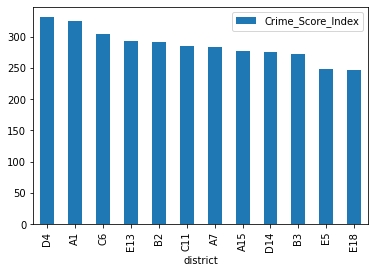

In [33]:
# Safety Scoring for each district from the year 2015 - Present

sql_statement = """
    select
        
        Crime_Incident_Reports.district as district
        , sum(dp_crime_table_score_card.Crime_Score)/count(Crime_Incident_Reports.district) as Crime_Score_Index
        --, count(Crime_Incident_Reports.Incident_Num)
    
    from 
    
        Crime_Incident_Reports
        left join dp_crime_table_score_card on dp_crime_table_score_card.Offense_Code = Crime_Incident_Reports.Offense_Code
    
    group by 1
    
    having
    
        ltrim(rtrim(Crime_Incident_Reports.district)) <> '' 
        and 
        lower(Crime_Incident_Reports.district) <> 'external'
    
    order by 
        
        Crime_Score_Index desc
    """
df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot(x = 'district', y = 'Crime_Score_Index', kind = 'bar')

,Year,shooting,other_crimes,total_crimes,percentage_of_shootings,percentage_of_other_crimes
0,2015,251,53346,53597,0.47,99.53
1,2016,345,99085,99430,0.35,99.65
2,2017,457,100881,101338,0.45,99.55
3,2018,402,98486,98888,0.41,99.59
4,2019,617,66992,67609,0.91,99.09
5,2020,1122,69772,70894,1.58,98.42
6,2021,860,64155,65015,1.32,98.68


,Year,percentage_of_shootings,percentage_of_other_crimes
0,2015,0.47,99.53
1,2016,0.35,99.65
2,2017,0.45,99.55
3,2018,0.41,99.59
4,2019,0.91,99.09
5,2020,1.58,98.42
6,2021,1.32,98.68


<AxesSubplot:title={'center':'Shootings to Other Crime Ratio'}, xlabel='Year'>

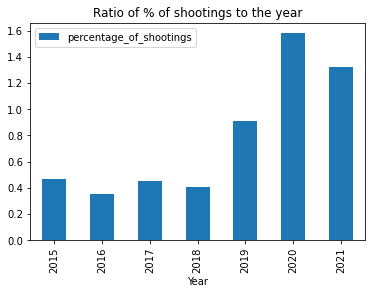

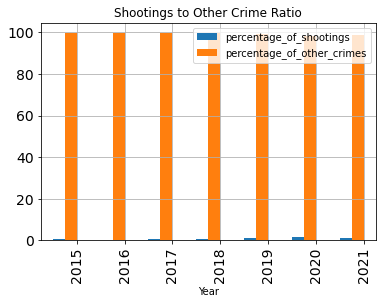

In [34]:
sql_statement = """
    with shooting_details as
    (
        select
           case 
               when Shooting in ('Y',1) then 1
               else 0
            end as Shooting_ind,
            Year

        from 

            Crime_Incident_Reports

    )
    select 

        year,
        sum(shooting_ind) as shooting,
        sum(case when Shooting_ind = 0 then 1 end) as other_crimes,
        count(year) as total_crimes,
        round(cast(sum(shooting_ind) as float)/cast(count(year) as float)*100,2) as percentage_of_shootings,
        round(cast(sum(case when Shooting_ind = 0 then 1 end) as float)/cast(count(year) as float)*100,2) as percentage_of_other_crimes 

    from shooting_details
    group by 1
    
    """

df = pd.read_sql_query(sql_statement, conn)
display(df)
df.plot(x = 'Year', y = 'percentage_of_shootings', kind = 'bar', title = 'Ratio of % of shootings to the year')
df1 = df[['Year','percentage_of_shootings', 'percentage_of_other_crimes']]
display(df1)
df1.plot.bar(x = 'Year', title = 'Shootings to Other Crime Ratio', grid = True, fontsize = 14, position = 1)


,Ethnicity,total_fatal_incidents
0,Hispanic or Latinx,301
1,Not Hispanic or Latinx,1201
2,Unknown,60


<AxesSubplot:title={'center':'Ratio of Fatal incidents among different ethnicity'}, xlabel='Ethnicity'>

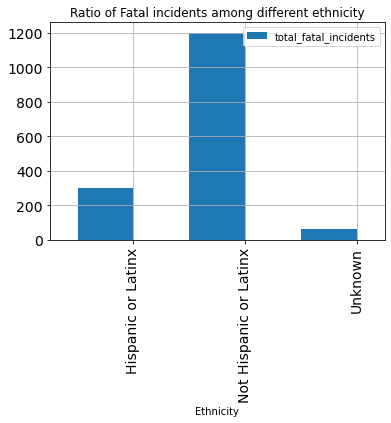

In [35]:

sql_statement = """
    select 
    
        Victim_Ethnicity_NIBRS as Ethnicity,
        count(*) as total_fatal_incidents
        
    from 
    
        Shootings
        
    group by 1
    
    having 
        
        ltrim(rtrim(Victim_Ethnicity_NIBRS)) <> ''
    
    ;
    """

df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot.bar(x = 'Ethnicity', title = 'Ratio of Fatal incidents among different ethnicity', grid = True, fontsize = 14, position = 1)


,Race,total_fatal_incidents
0,Asian,6
1,Black or African American,1258
2,Unknown,55
3,White,249


<AxesSubplot:title={'center':'Ratio of Fatal incidents among different races'}, xlabel='Race'>

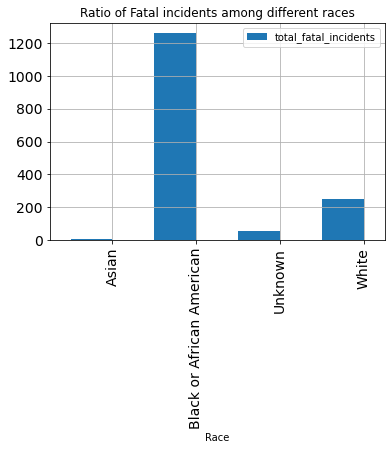

In [36]:

sql_statement = """
    select 
    
        Victim_Race as Race,
        count(*) as total_fatal_incidents
        
    from 
    
        Shootings
        
    group by 1
    
    having 
        
        ltrim(rtrim(Victim_Race)) <> ''
    
    ;
    """

df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot.bar(x = 'Race', y = 'total_fatal_incidents', title = 'Ratio of Fatal incidents among different races', grid = True, fontsize = 14, position = 1)


,Gender,total_fatal_incidents
0,Female,161
1,Male,1416


<AxesSubplot:title={'center':'Ratio of Fatal incidents among genders'}, xlabel='Gender'>

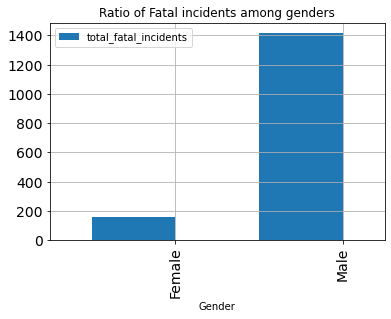

In [37]:

sql_statement = """
    select 
    
        Victim_Gender as Gender,
        count(*) as total_fatal_incidents
        
    from 
    
        Shootings
        
    group by 1
    
    having 
        
        ltrim(rtrim(Victim_Gender)) <> '' 
    
    ;
    """

df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot.bar(x = 'Gender', y = 'total_fatal_incidents', title = 'Ratio of Fatal incidents among genders', grid = True, fontsize = 14, position = 1)


,fatal_incidents,total_fatal_incidents
0,Fatal,261
1,Non-Fatal,1325


<AxesSubplot:title={'center':'Ratio of Fatal incidents vs total number of incidents'}, xlabel='fatal_incidents'>

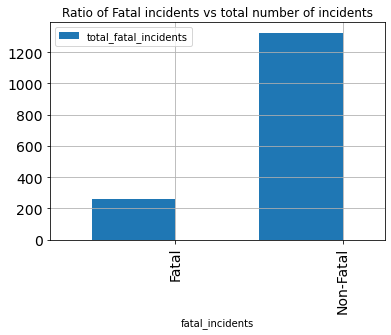

In [38]:

sql_statement = """
    select 
    
        Shooting_Type_V2 as fatal_incidents,
        count(*) as total_fatal_incidents
        
    from 
    
        Shootings
        
    group by 1
    
    ;
    """

df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot.bar(x = 'fatal_incidents', y = 'total_fatal_incidents', title = 'Ratio of Fatal incidents vs total number of incidents', grid = True, fontsize = 14, position = 1)



,Victims,total_fatal_incidents
0,Multiple_Victims,457
1,Single_Victim,1129


<AxesSubplot:title={'center':'Ratio of Fatal incidents among number of Victims'}, xlabel='Victims'>

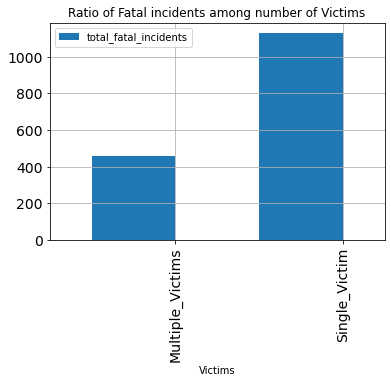

In [39]:

sql_statement = """
    select 
    
        case 
            when Multi_Victim == 't' then 'Multiple_Victims'
            else 'Single_Victim'
        end as Victims,
        count(*) as total_fatal_incidents
        
    from 
    
        Shootings
        
    group by 1
    
    having 
        
        ltrim(rtrim(Multi_Victim)) <> ''
    
    ;
    """

df = pd.read_sql_query(sql_statement, conn)
display(df)

df.plot.bar(x = 'Victims', y = 'total_fatal_incidents', title = 'Ratio of Fatal incidents among number of Victims', grid = True, fontsize = 14, position = 1)



,death_during_arrest,during_transport,death_during_while_in_holding_cell,prisoner_sex_mf,total_incidents
0,0,0,1,F,1
1,0,0,1,M,4
2,0,1,0,M,1


array([[<AxesSubplot:title={'center':'death_during_arrest'}>,
        <AxesSubplot:title={'center':'during_transport'}>],
       [<AxesSubplot:title={'center':'death_during_while_in_holding_cell'}>,
        <AxesSubplot:title={'center':'total_incidents'}>]], dtype=object)

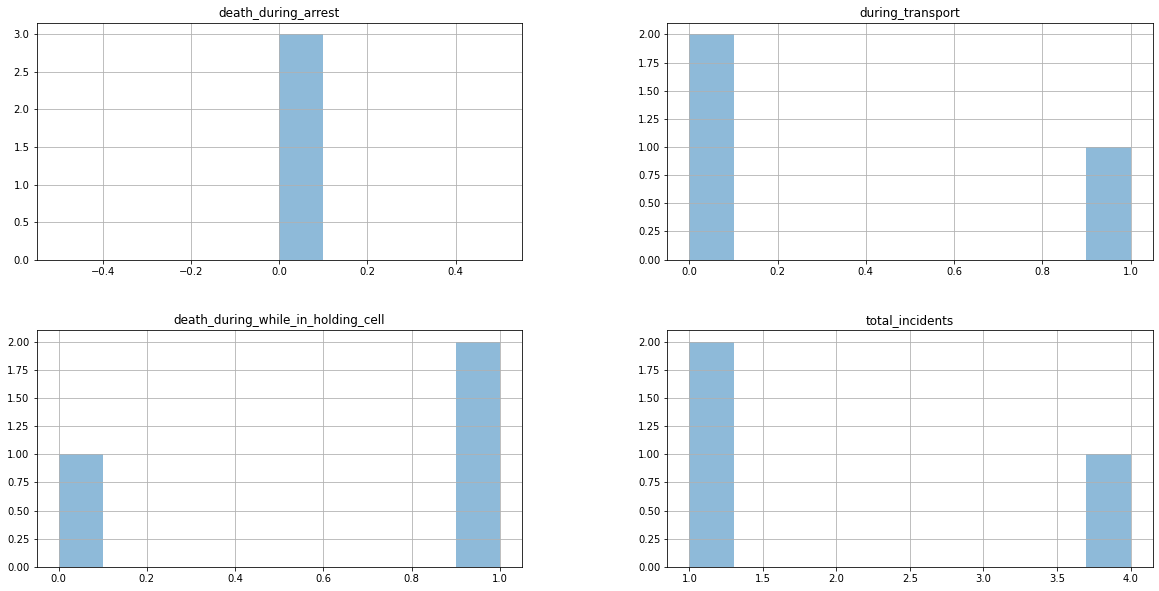

In [40]:

sql_statement = """
    select 
    
        case when during_arrest == 'No' then 0 else 1 end as death_during_arrest,
        case when during_transport == 'No' then 0 else 1 end as during_transport,
        case when while_in_holding_cell == 'No' then 0 else 1 end as death_during_while_in_holding_cell,
        prisoner_sex_mf,
        count(*) as total_incidents
    
    from 
    
        in_custody_deaths
    
    group by
    
        1,2,3,4
    ;
    """
df = pd.read_sql_query(sql_statement, conn)
display(df)
df.hist(alpha=0.5, figsize=(20, 10))


In [41]:
conn.close()

## Inferences

## Future Score